<a href="https://colab.research.google.com/github/DeekshaD18/MACHINE_LEARNING/blob/master/LinearRegression_using_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
iris = load_iris()

In [ ]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

DATAFRAME 

In [ ]:
features = pd.DataFrame(data=iris.data,columns = iris.feature_names)
target = pd.DataFrame(data = iris.target, columns=['Target'])
iris_data = pd.concat([features,target],axis=1)
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


CORRELATION

In [ ]:
data = iris_data.corr('pearson')
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
Target,0.782561,-0.426658,0.949035,0.956547,1.000000


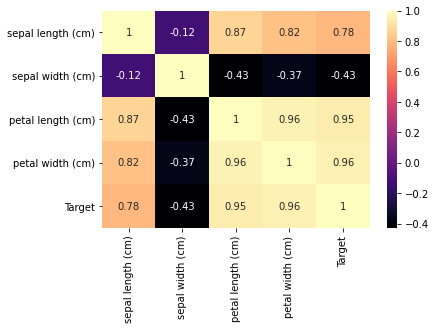

In [ ]:
sns.heatmap(data=data,cmap='magma',annot=True)

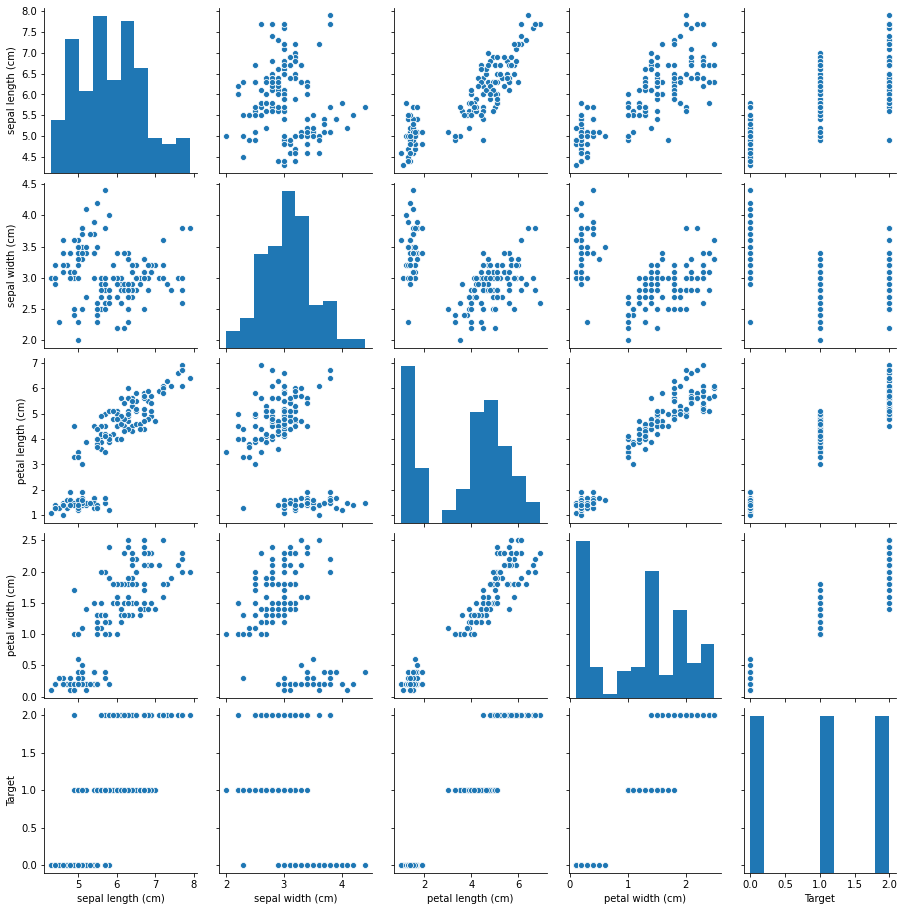

In [ ]:
sns.pairplot(iris_data)

TRAINING THE MODEL

In [ ]:
x = iris_data['petal width (cm)']
x

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal width (cm), Length: 150, dtype: float64

In [ ]:
y=iris_data['Target']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int64

In [ ]:
x = np.array(x/x.mean())
y = np.array(y/y.mean())

In [ ]:
n = int(0.8*len(x))
x_train = x[:n]
y_train = y[:n]

x_test = x[n:]
y_test = y[n:]

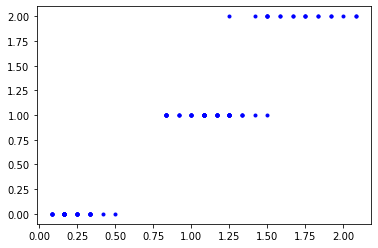

In [ ]:
plt.plot(x_train, y_train, 'b.')

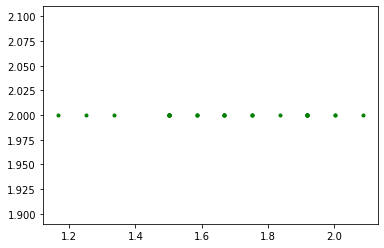

In [ ]:
plt.plot(x_test, y_test, 'g.')

In [ ]:
def hypothesis(a,b,x):
  return a*x + b

In [ ]:
def error(a,b,x,y):
  e = 0
  m = len(y)
  for i in range(m):
    e += np.power((hypothesis(a,b,x[i])-y[i]),2)
  return (1/(2*m)) *e

In [ ]:
def step_gradiet(a,b,x,y,learning_rate):
  grad_a = 0
  grad_b = 0
  m = len(x)
  for i in range(m):
    grad_a += 1/m * (hypothesis(a,b,x[i])-y[i]) *x[i]
    grad_b += 1/m * (hypothesis(a,b,x[i])-y[i])
  a = a- (grad_a * learning_rate)
  b = b- (grad_b * learning_rate)
  return a,b

In [ ]:
def descend(initial_a, initial_b, x,y,learning_rate, iterations):
  a = initial_a
  b = initial_b
  for i in range(iterations):
    e = error(a,b,x,y)
    if i % 1000 ==0:
      print(f"Error: {e}, a: {a}, b: {b}")
    a,b = step_gradiet(a,b,x,y,learning_rate)
  return a,b

In [ ]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000
final_a, final_b = descend(a,b,x_train, y_train, learning_rate, iterations)

Error: 0.2916666666666667, a: 0, b: 1
Error: 0.027309201984937293, a: 0.9949535319273002, b: -0.041042607645157415
Error: 0.020993658430735123, a: 1.1507978258301332, b: -0.20010658185789781
Error: 0.020842610512152245, a: 1.1748992613820417, b: -0.22470594332444013
Error: 0.020838997921484085, a: 1.1786265662498456, b: -0.22851025280391676
Error: 0.020838911519688832, a: 1.1792029967096682, b: -0.2290985920839969
Error: 0.02083890945322991, a: 1.179292142107428, b: -0.22918957918963362
Error: 0.020838909403806713, a: 1.179305928509249, b: -0.22920365041294322
Error: 0.02083890940262468, a: 1.1793080605865078, b: -0.22920582653805577
Error: 0.02083890940259639, a: 1.1793083903138355, b: -0.22920616307741673


In [ ]:
print(error(a,b,x_train, y_train))
print(error(final_a,final_b, x_train, y_train))

0.2916666666666667
0.02083890940259573


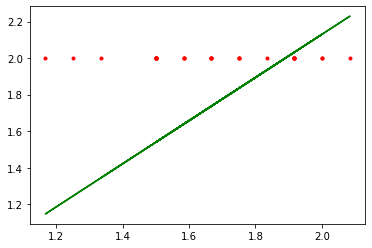

In [ ]:
plt.plot(x_test, y_test, 'r.', x_test, hypothesis(final_a, final_b, x_test), 'g')